In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
#plt.rcParams["figure.figsize"] = (10,6)

from labellines import labelLines
import pandas as pd


In [2]:
P = 50e3
r_0 = 50e-3
L = 500e-3
A_0 = np.pi*r_0**2
E = 200e9

y_t = np.linspace(0,L,100)

delta_teo = (P/(E*A_0))*L - (P/(E*A_0))*y_t
sigma_teo = np.ones(100)*P/A_0

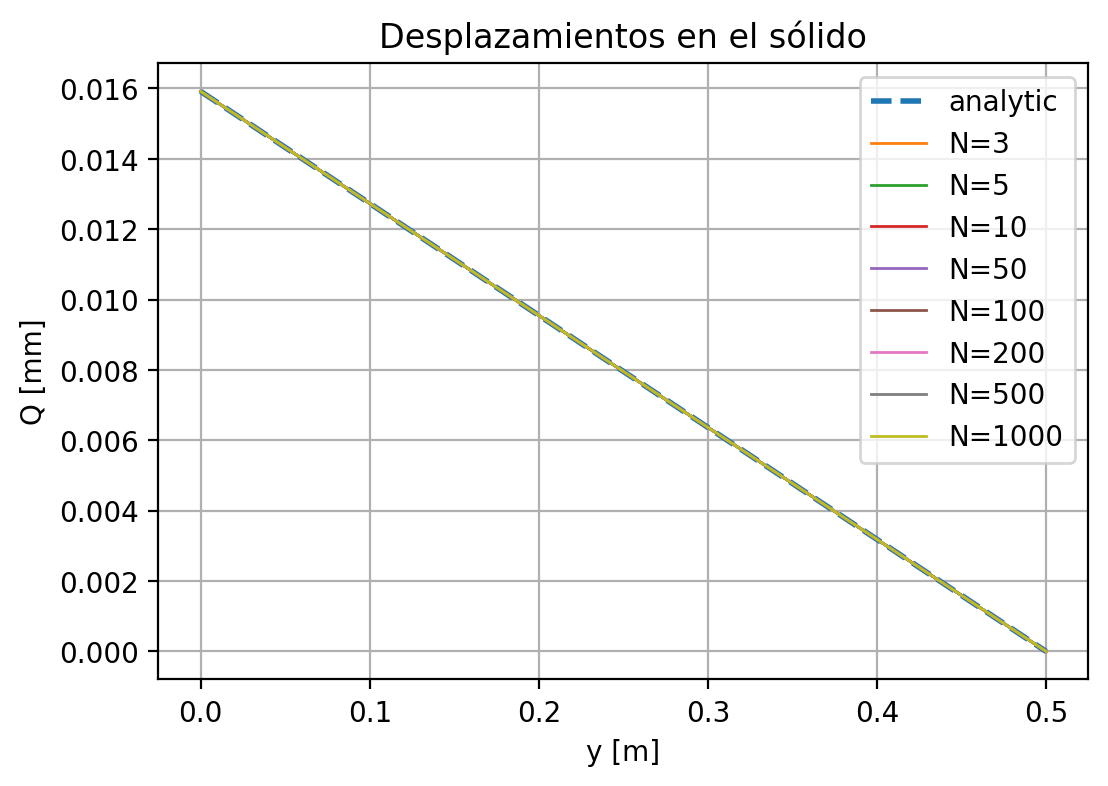

In [3]:
Ns = [3,5,10,50,100,200,500,1000]

plt.plot(y_t,delta_teo*10**3, label=f"analytic", linestyle='--', linewidth=2)

for N in Ns:
    Q = pd.read_csv(f"results/Q_{N}.dat", header=None, delim_whitespace=True).iloc[0]
    y = np.linspace(0,0.5,N)
    plt.plot(y,Q*10**3, label=f"N={N}", linewidth=1)

plt.legend()
plt.grid()
plt.xlabel('y [m]')
plt.ylabel('Q [mm]')
plt.title("Desplazamientos en el sólido")

fig = plt.gcf()
fig.set_size_inches(6, 4)

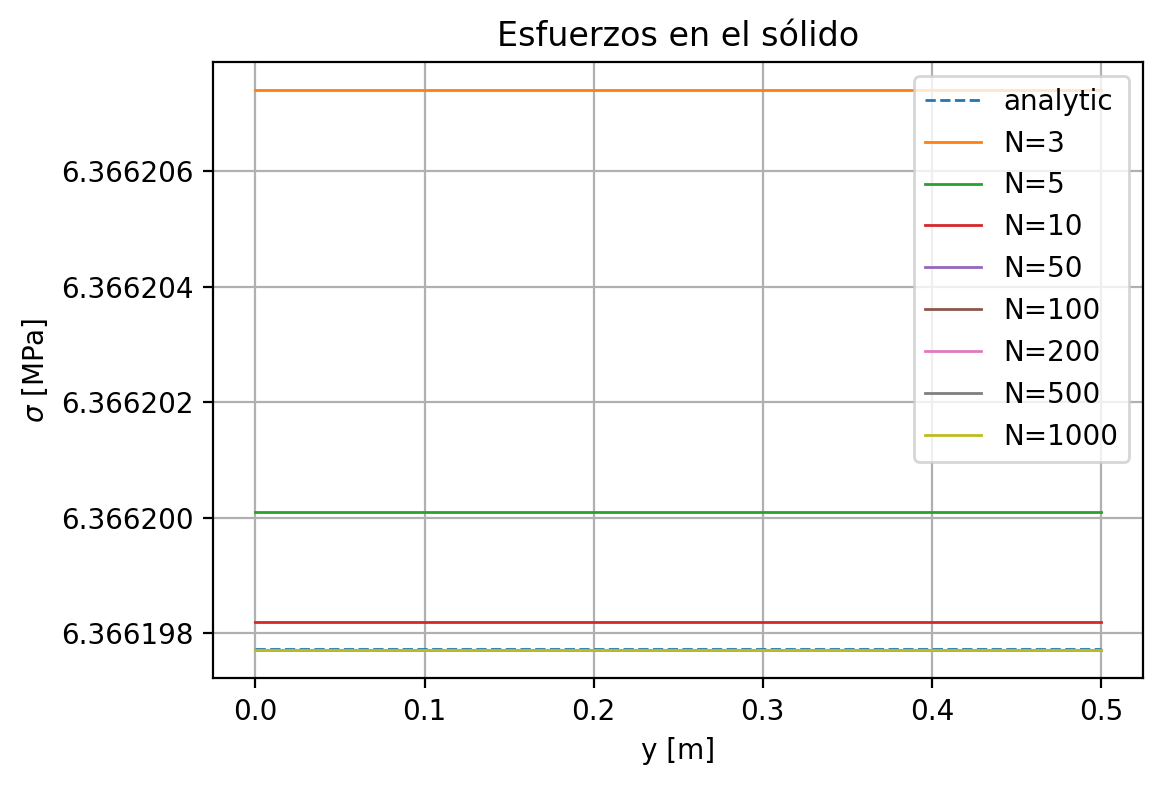

In [4]:

Ns = [3,5,10,50,100,200,500,1000]

plt.plot(y_t,sigma_teo/10**6, label=f"analytic", linestyle='--', linewidth=1)

sigma_prom = list()

for N in Ns:
    y = np.linspace(0,0.5,N-1)
    Sigma = pd.read_csv(f"results/Sigma_{N}.dat", header=None, delim_whitespace=True).iloc[0]
    plt.plot(y,-Sigma/10**6, label=f"N={N}", linewidth=1)
    sigma_prom.append(Sigma[0])

ax = plt.gca()
ax.ticklabel_format(useOffset=False, axis='y')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('y [m]')
plt.ylabel(r'$\sigma$ [MPa]')
plt.title("Esfuerzos en el sólido")

fig = plt.gcf()
fig.set_size_inches(6, 4)


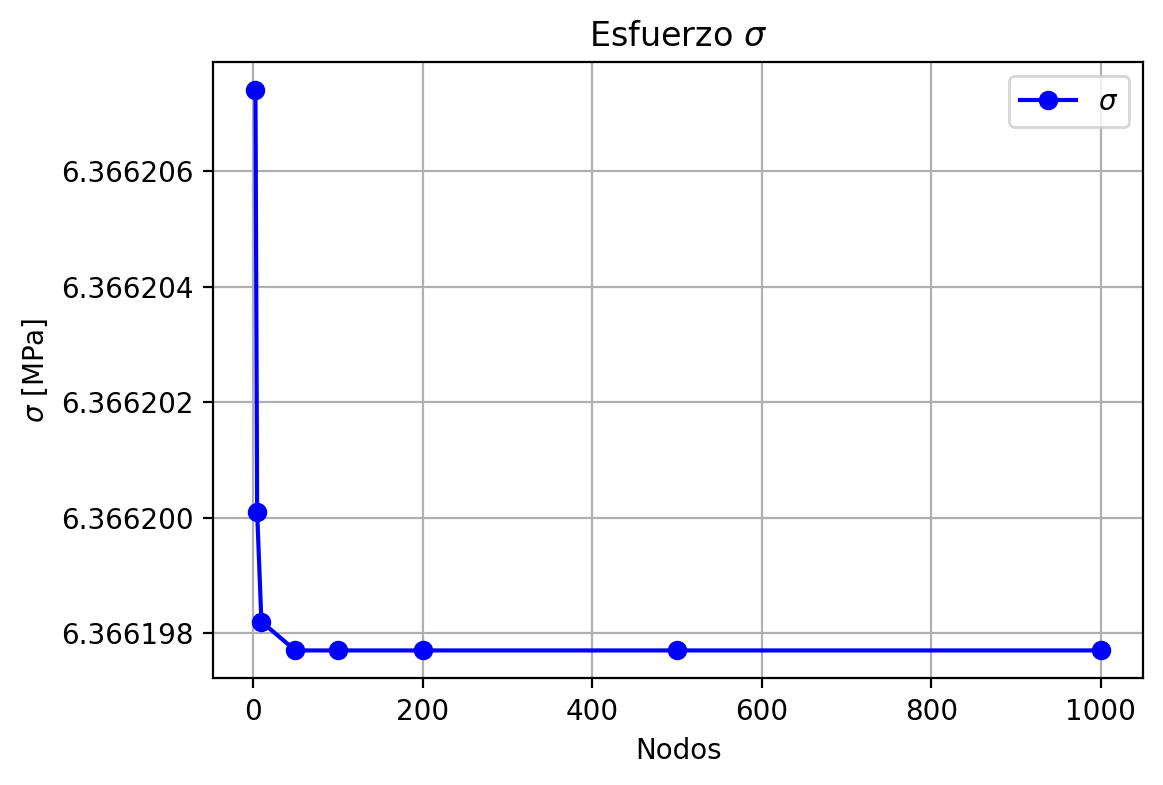

In [10]:

plt.plot(Ns,np.array(sigma_prom)*-1*10**-6, c='b', marker='o', label=r"$\sigma$")

plt.legend()
plt.grid()
plt.xlabel('Nodos')
plt.ylabel(r'$\sigma$ [MPa]')
plt.title(r"Esfuerzo $\sigma$")
ax = plt.gca()
ax.ticklabel_format(useOffset=False, axis='y')

fig = plt.gcf()
fig.set_size_inches(6, 4)

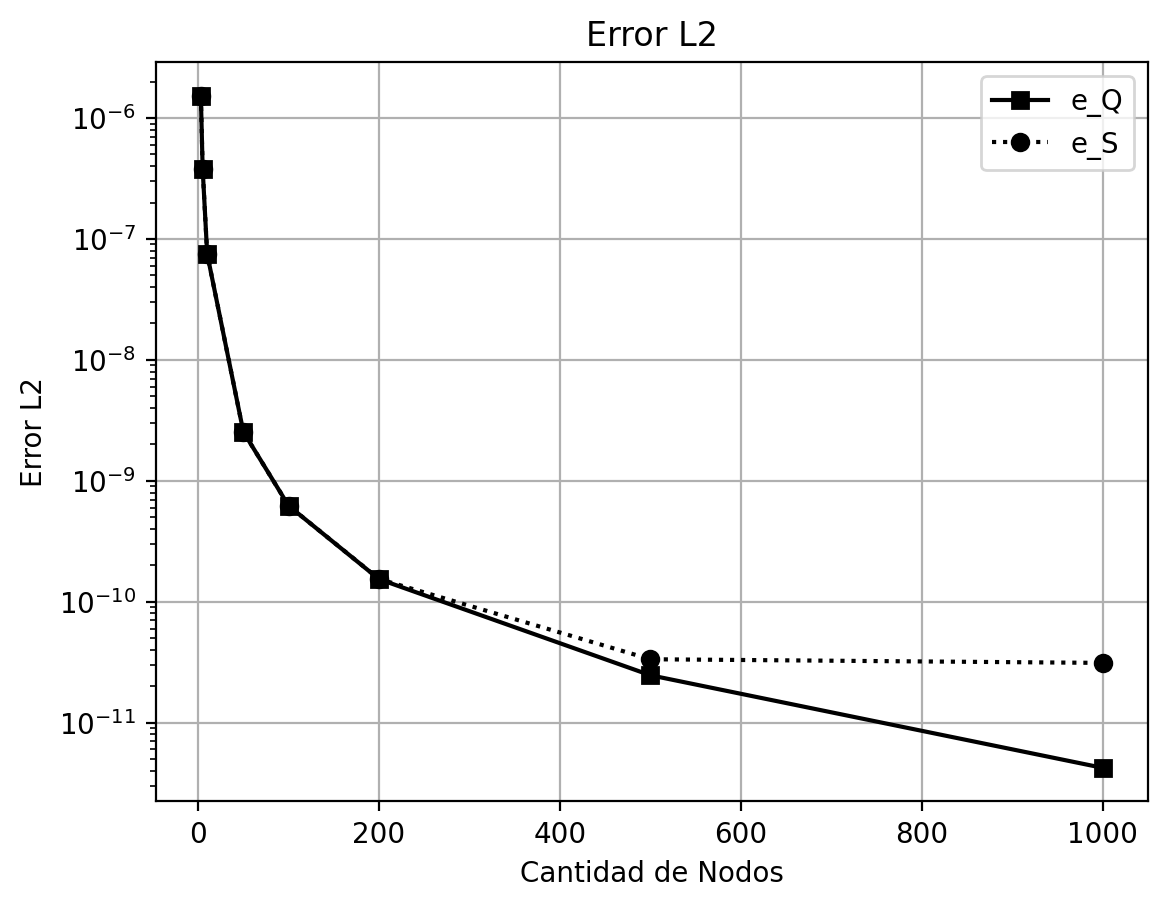

In [6]:
Ns = [3,5,10,50,100,200,500,1000]
e_Q = [1.5242e-06,  3.8105e-07, 7.5270e-08,2.5393e-09,6.2196e-10,1.5371e-10,2.4659e-11,4.2308e-12]
e_S = [1.5242e-06,3.8105e-07, 7.5270e-08,2.5393e-09,6.2200e-10,1.5407e-10,3.3446e-11,3.1205e-11]

plt.plot(Ns, e_Q, c='k', ls='-', marker='s', label='e_Q')
plt.plot(Ns, e_S, c='k', ls=':', marker='o', label='e_S')
plt.yscale('log')
plt.grid()
plt.xlabel('Cantidad de Nodos')
plt.ylabel('Error L2')
plt.title("Error L2")

plt.legend(loc='best');